In [1]:
import os
import numpy as np
import random
import GPy
import matplotlib.pyplot as plt
import pandas as pd

GPy.plotting.change_plotting_library('matplotlib')


Let us pick an article

In [2]:
df= pd.read_csv('ELAEGLUT201 .csv', parse_dates=False, header=0, usecols=[1,2,3],sep=' ' )
df=df.sort_values(by=['Numdate'])


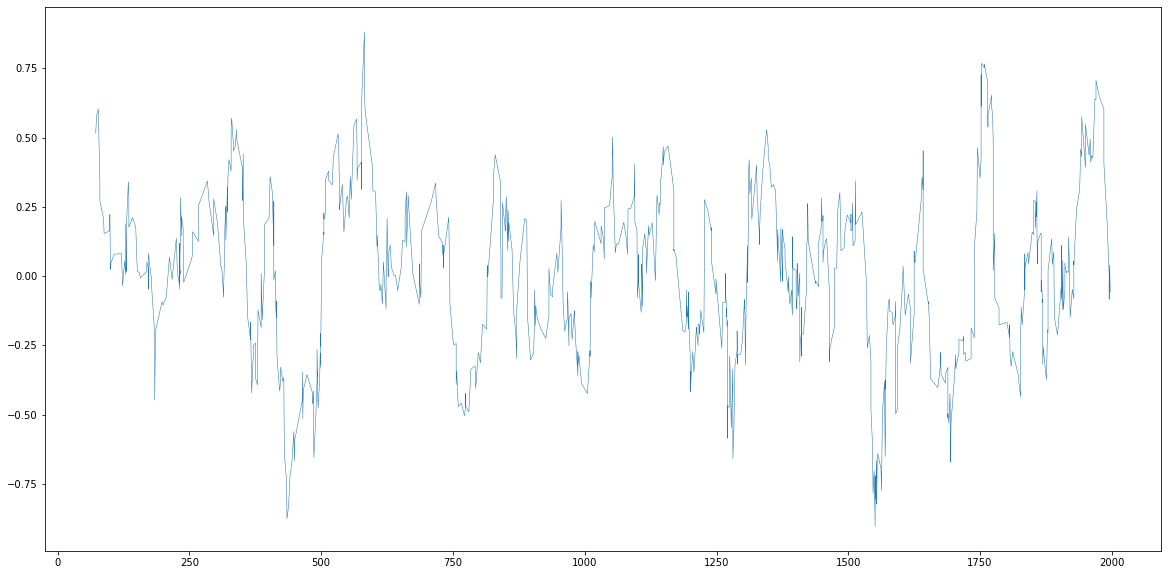

In [3]:
X=df['Numdate'].values.reshape(len(df),1)
Y=df['Logorder'].values.reshape(len(df),1)

h=20
Sm=df['Logorder'].rolling(h).sum()/h
Sl=Sm.values.reshape(len(df),1)
S=Sl[h:len(Y)]
X=X[h:len(Y)]
S=S-np.mean(S)

plt.figure(figsize=(20,10))
plt.plot(X, S,linewidth=0.5)

In [4]:
T=800

In [5]:
ker=GPy.kern.StdPeriodic(1,period=T)

In [6]:
m = GPy.models.GPRegression(X[1:600],S[1:600],ker)


 /home/carlos/anaconda3/lib/python3.8/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1



Name : GP regression
Objective : -185.147068456405
Number of Parameters : 4
Number of Optimization Parameters : 4
Updates : True
Parameters:
  GP_regression.            |                 value  |  constraints  |  priors
  std_periodic.variance     |    0.0487389166042424  |      +ve      |        
  std_periodic.period       |     806.8779724520529  |      +ve      |        
  std_periodic.lengthscale  |  0.039261786537030066  |      +ve      |        
  Gaussian_noise.variance   |   0.02364170136981724  |      +ve      |        


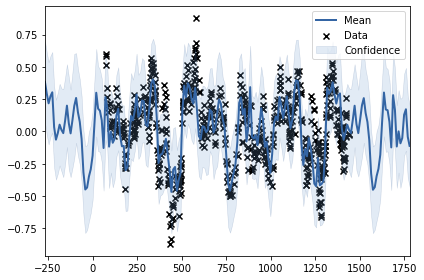

In [7]:
# optimize and plot
m.optimize(messages=True,max_f_eval = 2000)
fig = m.plot()
print(m)

In [8]:
Yp, Vp = m.predict(X)
lo, up = m.predict_quantiles(X, quantiles=(2.5, 97.5), Y_metadata=None, kern=None, likelihood=None)


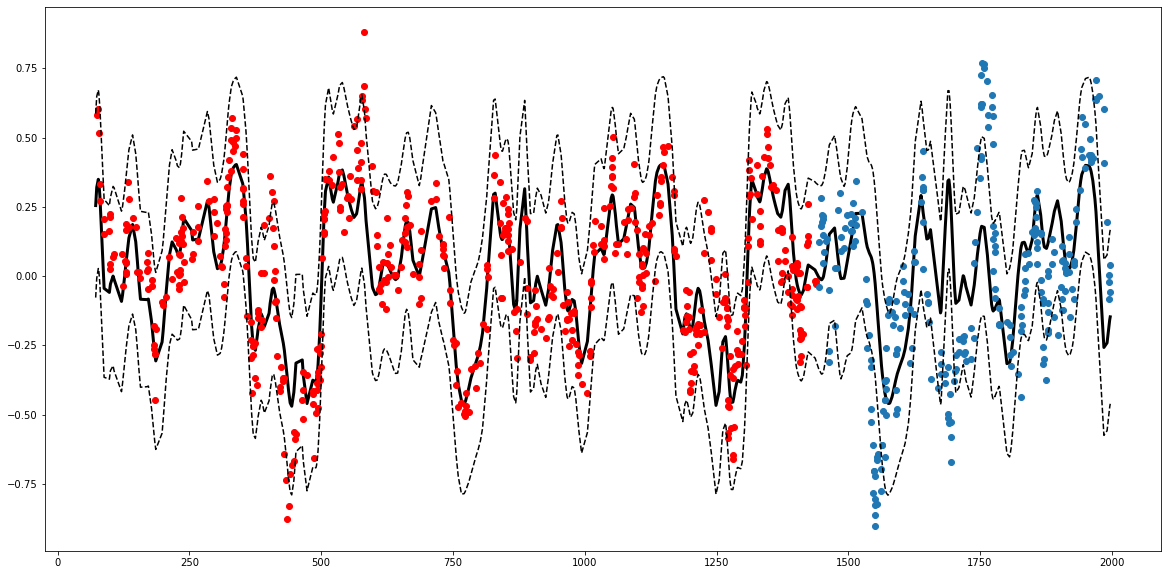

In [9]:
plt.figure(figsize=(20,10))
plt.plot(X,Yp,'black',linewidth=3)
plt.plot(X[1:600], S[1:600], "or")
plt.plot(X[600:len(X)], S[600:len(X)], "o")
plt.plot(X,lo,'--',color='black')
plt.plot(X,up,'--',color='black')